# **CÂU HỎI 4:**
**Thống kê lương theo loại công ty, đưa ra nhận xét.**

Để trả lời câu hỏi trên ta sẽ phân loại công ty công nghệ, ngân hàng, thực phẩm,...

In [23]:
### Import các thư viện cần thiết
import pandas as pd
import numpy as np
import warnings
import re 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Đọc dữ liệu từ file `./data.csv` và lưu vào dataframe `df`

In [24]:
df = pd.read_csv('data.csv')
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


## 1. Tiền xử lý dữ liệu cho câu hỏi 

Trước hết, ta sẽ loại bỏ tất cả các dòng chứa phần tử `NaN`

In [25]:
new_df = df.dropna()

### Tính mức lương trung bình của từng thông tin tuyển dụng
Vì từng thông tin tuyển dụng, mức lương được lưu theo dạng `tuple` với [***min_salary***, ***max_salary***]. Do đó, ta sẽ tính ***avg_salary*** của từng thông tin tuyển dụng.

In [26]:
def avg_Salary(salary):
    salary = salary.replace("(",'').replace(")",'').replace(" ",'')
    salary = salary.split(',')
    avg = (float(salary[0]) + float(salary[1])) / 2
    return avg

In [27]:
new_df["Salary"] = new_df["Salary"].apply(avg_Salary)

### Phân loại công ty
Tiếp theo ta sẽ phân loại các công ty thành 4 loại:
- Công ty công nghệ.
- Công ty thương mại.
- Công ty dịch vụ.
- Các công ty khác.

In [28]:
def TypeCopany(Company):
    Company =  Company.lower()
    tech = ["công nghệ", "cong nghe", "software", "microtec", "skynet", "phần mềm", "cntt", "tech",'soft','tin','cmc' ]
    dichvu = ["dich vu", "dịch vụ", "viễn thông", 'dv', 'media', 'giải trí', 'luxstay']
    thuongmai = ["thuong mai", "thương mại", 'fin', 'đầu tư', 'business','pay']
    for i in thuongmai:
        if i in Company:
            return "Thương mại"
    for i in dichvu:
        if i in Company:
            return "Dịch vụ"
    for i in tech:
        if i in Company:
            return "Công nghệ"
    return "Khác"

In [29]:
new_df["Type_Company"] = new_df["Company"].apply(TypeCopany)

In [30]:
new_df["Type_Company"].value_counts()

Khác          299
Công nghệ     232
Dịch vụ       103
Thương mại     47
Name: Type_Company, dtype: int64

## 2. Trả lời câu hỏi

Ta sẽ phân `Quantity` và `Salary` theo từng loại công ty `type` mà ta đã chia

In [31]:
def salary_quantity(type):
    salary_df = new_df[new_df['Type_Company'] == type]['Salary']
    quantity_df = new_df[new_df['Type_Company'] == type]['Quantity']
    sum_of_quantity = new_df[new_df['Type_Company'] == type]['Quantity'].sum()
    
    Salary_ = (salary_df * quantity_df).sum() / sum_of_quantity
    Quantity_ = new_df[new_df['Type_Company']==type]['Quantity'].sum()
    return [type, int(Salary_), Quantity_]

In [32]:
list_sal_quan = []
Type_com = ["Thương mại","Dịch vụ","Công nghệ",'Khác']
for i in Type_com:
    list_sal_quan.append(salary_quantity(i))

### ***Trực quan hoá dữ liệu và đưa ra nhận xét, kết luận***
#### 2.1. Mối quan hệ giữa số lượng nhân sự cần tuyển và mức lương trung bình
Xét theo từng loại công ty, ta sẽ có mối quan hệ giữa số lượng nhân sự cần tuyển và mức lương trung bình

In [33]:
visualize_type_sal_quan = pd.DataFrame(list_sal_quan, columns=["Type", 'Salary', 'Quantity'])
visualize_type_sal_quan.set_index("Type", inplace=True)

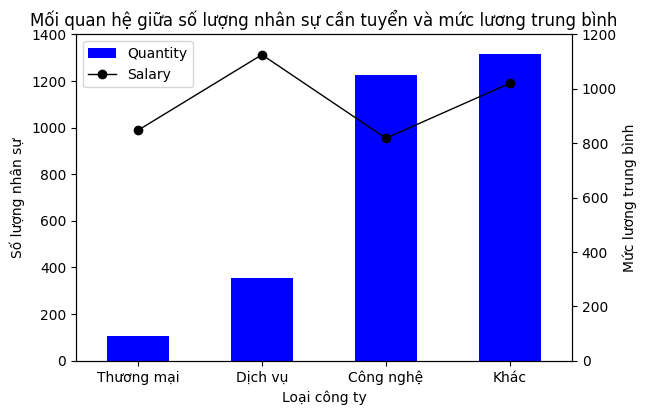

In [34]:
fig, ax = plt.subplots()

visualize_type_sal_quan['Quantity'].plot(kind='bar', stacked=False, title='get_title', 
                           color='blue', ax=ax, grid=False)
ax_twinx = ax.twinx()
ax_twinx.plot(ax.get_xticks(), visualize_type_sal_quan['Salary'], linestyle='-', marker='o', 
        color='k', linewidth=1.0, label='Salary')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax_twinx.get_legend_handles_labels()

ax.legend(lines1 + lines2, labels1 + labels2, loc='best')
ax.yaxis.set_ticks_position("left")
ax.set_ylim(0,1400)
ax_twinx.yaxis.set_ticks_position("right")
ax_twinx.set_ylim(0,1200)

fig.autofmt_xdate(rotation=0, ha='center')
ax.set_title('Mối quan hệ giữa số lượng nhân sự cần tuyển và mức lương trung bình')
ax.set_xlabel('Loại công ty')
ax.set_ylabel('Số lượng nhân sự')
ax_twinx.set_ylabel('Mức lương trung bình')
plt.show()

**NHẬN XÉT:**
- Có thể thấy số lượng nhân sự cần tuyển của công ty ***Công nghệ*** thì khác cao khoảng `1200` người, tuy nhiên mức lương trung bình thì lại thấp nhất.
- Mức lương trung bình của công ty ***Dịch vụ*** thì cao nhất dù số lượng nhân sự cần tuyển chỉ khoảng `400` người.

#### Mối quan hệ giữ mức lương và các title của các loại công ty

In [36]:
def draw_plot(df):
    Company_df = df[["Title","Salary"]]
    Company_df = Company_df.groupby(by='Title').mean().sort_values(by='Salary', ascending=False)
    Company_df = Company_df[:20]
    Company_df = Company_df.reset_index()

    sns.barplot(x=Company_df['Salary'], y=Company_df['Title'])
    plt.xlabel('Mức lương')

#### 2.2. Mối quan hệ giữa mức lương và các nội dung (title) của công ty Công Nghệ

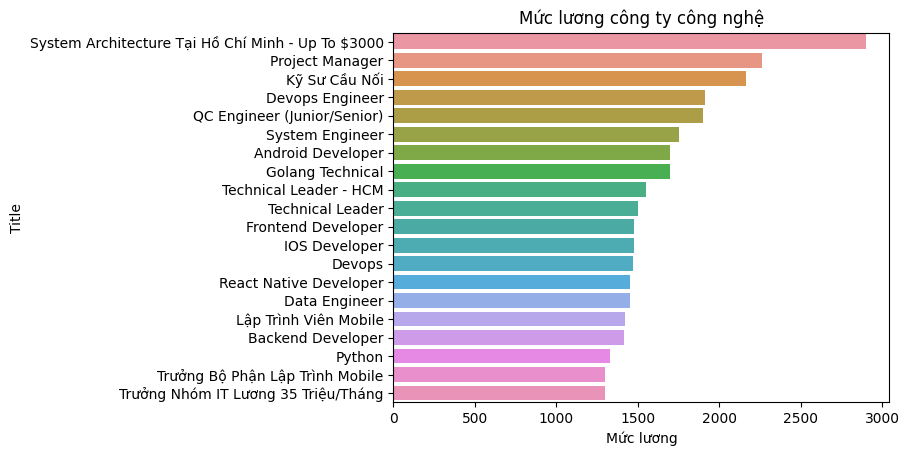

In [37]:
draw_plot(new_df[new_df["Type_Company"]=='Công nghệ'])
plt.title('Mức lương công ty công nghệ')
plt.show()

**NHẬN XÉT:** Mức lương các công ty về công nghệ
- Mức lương cao nhất là gần 3000$/ tháng.
- Các title có lương cao nhất là project manager, hoặc senior.

#### 2.3. Mối quan hệ giữa mức lương và các nội dung (title) của công ty Dịch vụ

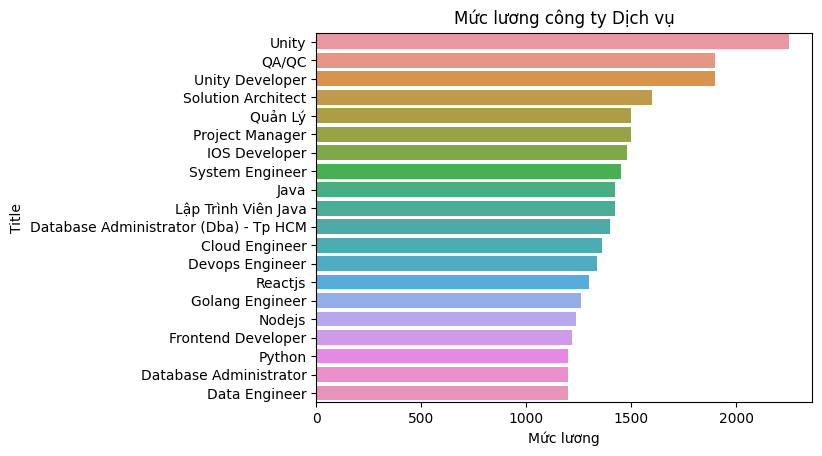

In [38]:
draw_plot(new_df[new_df["Type_Company"]=='Dịch vụ'])
plt.title('Mức lương công ty Dịch vụ')
plt.show()

**NHẬN XÉT:** Mức lương các công ty về dịch vụ
- Mức lương cao nhất là khoảng hơn 2000$/ tháng.
- Các title có lương cao nhất là android, frontend,... Chủ yếu là về công nghệ phần mềm. 
- Có thể thấy xu hướng của các công ty dịch vụ là kết hợp dịch vụ và công nghệ phần mềm.

#### 2.4. Mối quan hệ giữa mức lương và các nội dung (title) của công ty Thương mại

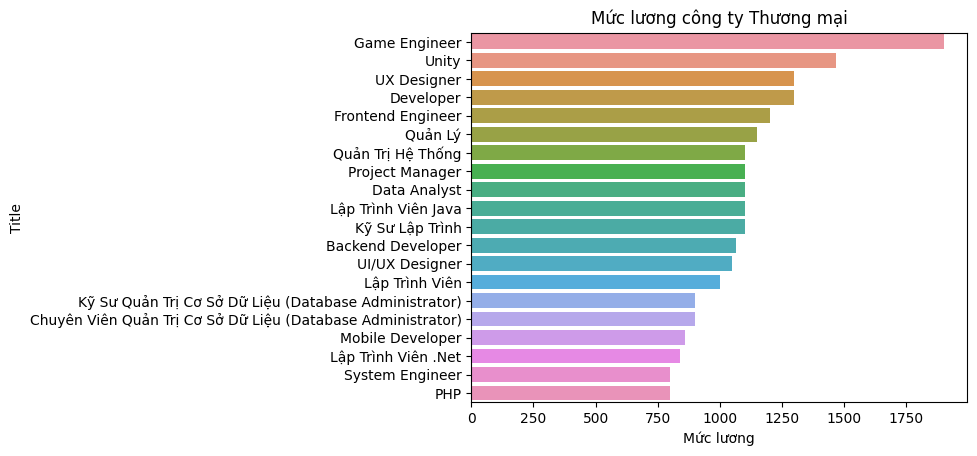

In [39]:
draw_plot(new_df[new_df["Type_Company"]=='Thương mại'])
plt.title('Mức lương công ty Thương mại')
plt.show()

**NHẬN XÉT:** Mức lương các công ty về thương mại
- Mức lương cao nhất là khoảng gần 1800$/tháng.
- Các title có lương cao nhất là data analyst, quản lý...
- Có thể thấy công ty thương mại tập trung vào phân tích, xu hướng khách hàng,...

#### 2.5. Mối quan hệ giữa mức lương và các nội dung (title) của các công ty khác

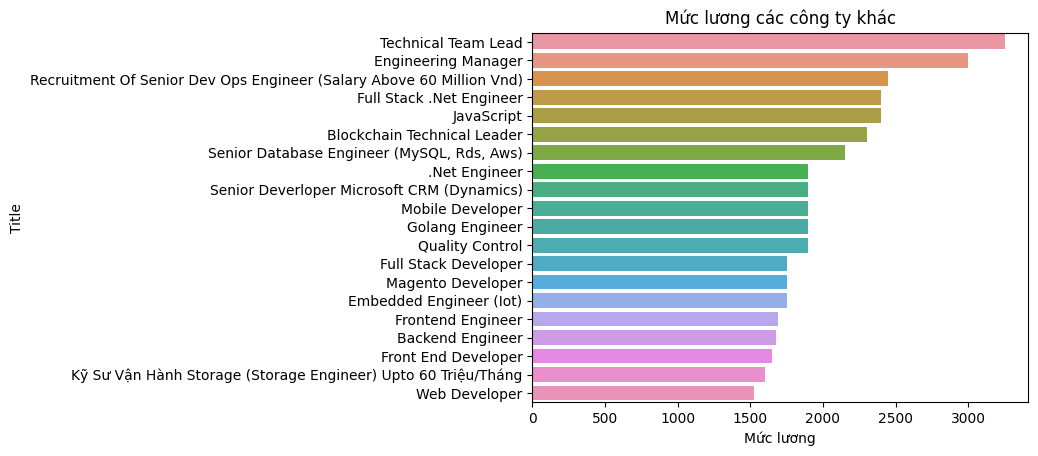

In [40]:
draw_plot(new_df[new_df["Type_Company"]=='Khác'])
plt.title('Mức lương các công ty khác')
plt.show()

**NHẬN XÉT:** Đối với các công ty khác
- Mức lương cao nhất là trên 3000$/1 tháng.
- Dẫn đầu với xu thế là các ưu tiên lựa chọn leader hoặc các manager hoặc các engineer,...

## **KẾT LUẬN**
- Với mỗi công ty về lĩnh vực khác nhau sẽ có nhu cầu về lập trình viên các mảng khác nhau.
- Tuy nhiên, mỗi ngành đều có xu hướng phát triển cùng với công nghệ thông tin trong tương lai.